# Shogun Vs Sklearn : Classification

In [1]:
%matplotlib inline
from modshogun import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import time

# Datasets

In [2]:
generation1 = datasets.make_classification(n_samples=700, n_features=2,n_classes=2,n_redundant=0,n_informative =2
                                           ,n_clusters_per_class=1)
generation2 = datasets.make_classification(n_samples=5000, n_features=2,n_classes=4,n_redundant=0,n_informative =2,
                                           n_clusters_per_class=1)
generation3 = datasets.make_classification(n_samples=20000, n_features=10,n_classes=10,n_redundant=0,n_informative =5)
generation4 = datasets.make_classification(n_samples=20000, n_features=50,n_classes=10,n_redundant=0,n_informative =5)


feats1 = generation1[0]
labels1 = generation1[1]

feats2 = generation2[0]
labels2 = generation2[1]

feats3 = generation3[0]
labels3 = generation3[1]

feats4 = generation4[0]
labels4 = generation4[1]

feats1_train = feats1[:600]
feats1_test = feats1[600:]
labels1_train = labels1[:600]
labels1_test = labels1[600:]

feats2_train = feats2[:4500]
feats2_test = feats2[4500:]
labels2_train = labels2[:4500]
labels2_test = labels2[4500:]

feats3_train = feats3[:19000]
feats3_test = feats3[19000:]
labels3_train = labels3[:19000]
labels3_test = labels3[19000:]

feats4_train = feats4[:19000]
feats4_test = feats4[19000:]
labels4_train = labels4[:19000]
labels4_test = labels4[19000:]

feats1_train_inverted = map(list, zip(*feats1_train))
feats1_test_inverted = map(list, zip(*feats1_test))
feats2_train_inverted = map(list, zip(*feats2_train))
feats2_test_inverted = map(list, zip(*feats2_test))
feats3_train_inverted = map(list, zip(*feats3_train))
feats3_test_inverted = map(list, zip(*feats3_test))
feats4_train_inverted = map(list, zip(*feats4_train))
feats4_test_inverted = map(list, zip(*feats4_test))

shogun_feats1_train = RealFeatures(np.array(feats1_train_inverted))
shogun_feats1_test = RealFeatures(np.array(feats1_test_inverted))
shogun_labels1_train = MulticlassLabels(labels1_train*1.0)
shogun_labels1_test = MulticlassLabels(labels1_test*1.0)

shogun_feats2_train = RealFeatures(np.array(feats2_train_inverted))
shogun_feats2_test = RealFeatures(np.array(feats2_test_inverted))
shogun_labels2_train = MulticlassLabels(labels2_train*1.0)
shogun_labels2_test = MulticlassLabels(labels2_test*1.0)

shogun_feats3_train = RealFeatures(np.array(feats3_train_inverted))
shogun_feats3_test = RealFeatures(np.array(feats3_test_inverted))
shogun_labels3_train = MulticlassLabels(labels3_train*1.0)
shogun_labels3_test = MulticlassLabels(labels3_test*1.0)

shogun_feats4_train = RealFeatures(np.array(feats4_train_inverted))
shogun_feats4_test = RealFeatures(np.array(feats4_test_inverted))
shogun_labels4_train = MulticlassLabels(labels4_train*1.0)
shogun_labels4_test = MulticlassLabels(labels4_test*1.0)

### Data visualization methods

In [3]:
def plot_binary_data(plot,X_train, y_train):
    """
    This function plots 2D binary data with different colors for different labels.
    """
    plot.xlabel(r"$x$")
    plot.ylabel(r"$y$")
    plot.plot(X_train[0, np.argwhere(y_train == 1)], X_train[1, np.argwhere(y_train == 1)], 'bo')
    plot.plot(X_train[0, np.argwhere(y_train == 0)], X_train[1, np.argwhere(y_train == 0)], 'ro')
    plot.plot(X_train[0, np.argwhere(y_train == 2)], X_train[1, np.argwhere(y_train == 2)], 'go')
    plot.plot(X_train[0, np.argwhere(y_train == 3)], X_train[1, np.argwhere(y_train == 3)], 'yo')

In [4]:
def compute_plot_isolines(classifier,features,size=200,fading=True):
    """
    This function computes the classification of points on the grid
    to get the decision boundaries used in plotting
    """
    x1 = np.linspace(-5, 5, size)
    x2 = np.linspace(-5,5, size)

    x, y = np.meshgrid(x1, x2)

    plot_features=RealFeatures(np.array((np.ravel(x), np.ravel(y))))
    
    if fading == True:
        plot_labels = classifier.apply(plot_features).get_values()
    else:
        plot_labels = classifier.apply(plot_features).get_labels()
    z = plot_labels.reshape((size, size))
    return x,y,z

In [5]:
def plot_model(plot,classifier,features,labels,fading=True):
    """
    This function plots an input classification model
    """
    x,y,z = compute_plot_isolines(classifier,features,fading=fading)
    plot.pcolor(x,y,z,cmap='RdBu_r')
    plot.contour(x, y, z, linewidths=1, colors='black')

In [6]:
def compute_plot_isolines_sk(classifier,features,size=200):
    """
    This function computes the classification of points on the grid
    to get the decision boundaries used in plotting
    """
    x1 = np.linspace(-5,5, size)
    x2 = np.linspace(-5,5, size)

    x, y = np.meshgrid(x1, x2)
    plot_labels = classifier.predict(np.c_[x.ravel(), y.ravel()])
    z = plot_labels.reshape(x.shape)
    return x,y,z

def plot_model_sk(plot,classifier,features,labels,fading=True):
    """
    This function plots an input classification model
    """
    x,y,z = compute_plot_isolines_sk(classifier,features)
    plot.pcolor(x,y,z,cmap='RdBu_r')
    plot.contour(x, y, z, linewidths=1, colors='black')

# KNN

### dataset 1 , size 600 , Dimensions 2 , classes 2

In [7]:
number_of_neighbors = 10

distances1 = EuclideanDistance(shogun_feats1_train, shogun_feats1_train)
shogun_knn1 = KNN(number_of_neighbors,distances1,shogun_labels1_train)
shogun_knn1.train()

print np.sum((labels1_test == shogun_knn1.apply(shogun_feats1_test).get_labels()))/100.0

from sklearn.neighbors import KNeighborsClassifier

sklearn_knn1 =KNeighborsClassifier(n_neighbors=number_of_neighbors)
sklearn_knn1.fit(feats1_train,labels1_train)
print np.sum(sklearn_knn1.predict(feats1_test) == labels1_test)/100.0


0.92
0.92


### Decision Boundaries Comparison

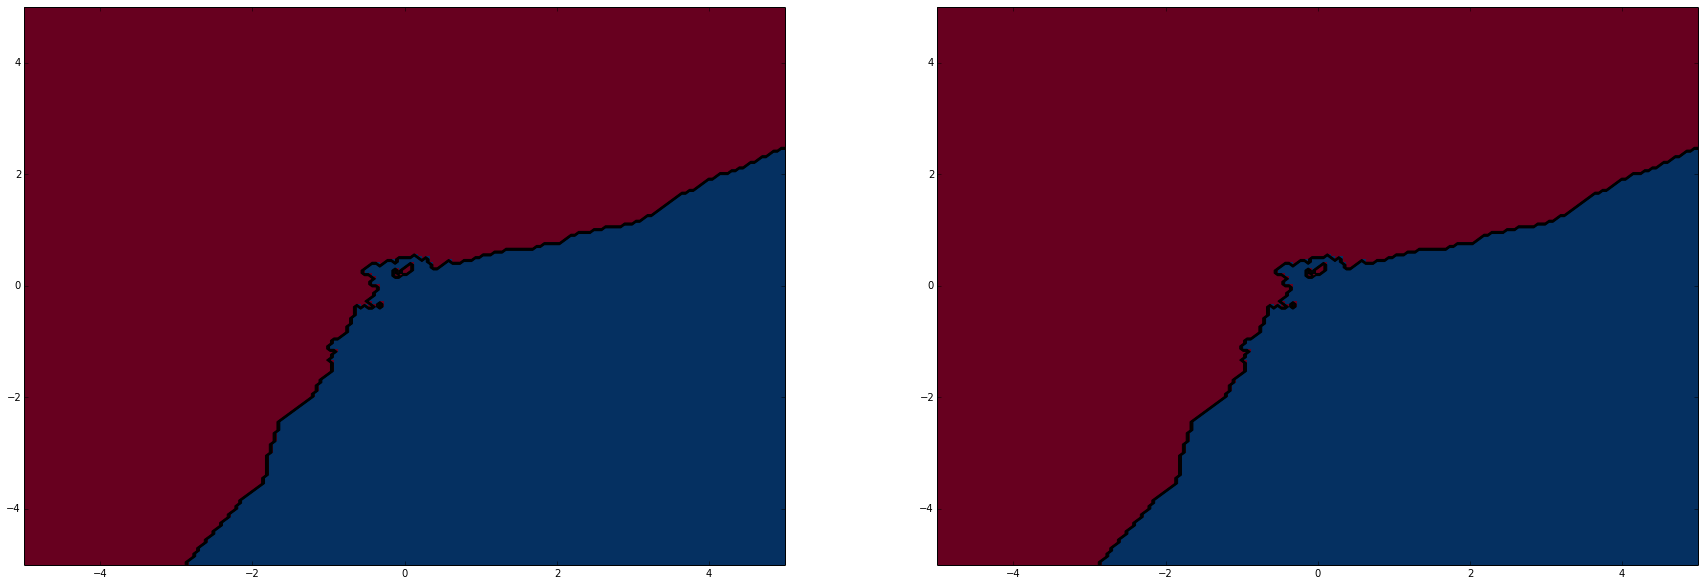

In [9]:
plt.figure(figsize=(30,10))
plt.subplot(121)
plot_model_sk(plt,sklearn_knn1,feats1_train,labels1_train)
plt.subplot(122)
plot_model(plt,shogun_knn1,shogun_feats1_train.get_feature_matrix(),labels1_train,fading=False)

### Dataset 2 , classes 4 , features 2

In [10]:
number_of_neighbors = 10

distances2 = EuclideanDistance(shogun_feats2_train, shogun_feats2_train)
shogun_knn2 = KNN(number_of_neighbors,distances2,shogun_labels2_train)
shogun_knn2.train()
print sum(labels2_test == shogun_knn2.apply(shogun_feats2_test).get_labels())/500.0

from sklearn.neighbors import KNeighborsClassifier

sklearn_knn2 =KNeighborsClassifier(n_neighbors=number_of_neighbors)
sklearn_knn2.fit(feats2_train,labels2_train)
print sum(sklearn_knn2.predict(feats2_test) == labels2_test)/500.0

0.888
0.888


### Decision Boundaries comparison

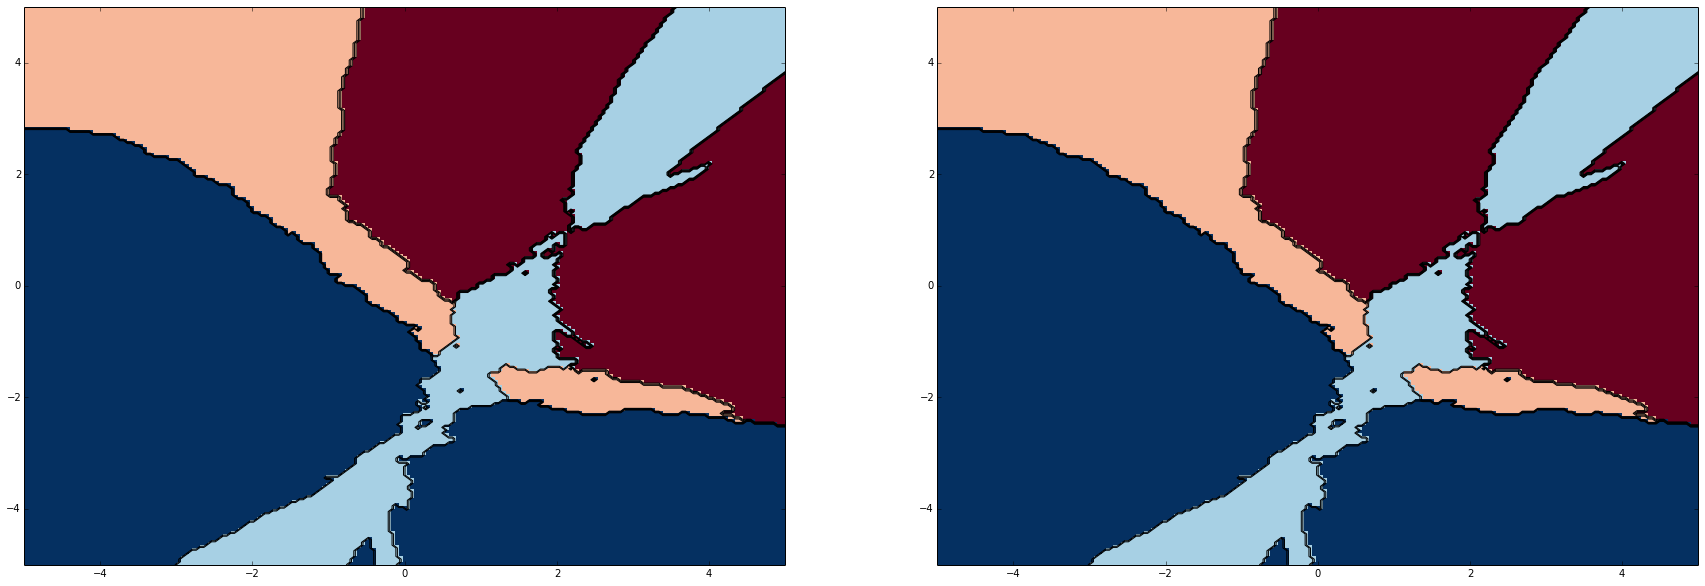

In [11]:
plt.figure(figsize=(30,10))
plt.subplot(121)
plot_model_sk(plt,sklearn_knn2,feats2_train,labels2_train)
plt.subplot(122)
plot_model(plt,shogun_knn2,shogun_feats2_train.get_feature_matrix(),labels2_train,fading=False)

In [12]:
number_of_neighbors = 10

distances3 = EuclideanDistance(shogun_feats3_train, shogun_feats3_train)
shogun_knn3 = KNN(number_of_neighbors,distances3,shogun_labels3_train)
shogun_knn3.train()
print sum(labels3_test == shogun_knn3.apply(shogun_feats3_test).get_labels())/1000.0

from sklearn.neighbors import KNeighborsClassifier

sklearn_knn3 =KNeighborsClassifier(n_neighbors=number_of_neighbors)
sklearn_knn3.fit(feats3_train,labels3_train)
print sum(sklearn_knn3.predict(feats3_test) == labels3_test)/1000.0

0.67
0.67


In [13]:
number_of_neighbors = 10

distances4 = EuclideanDistance(shogun_feats4_train, shogun_feats4_train)
shogun_knn4 = KNN(number_of_neighbors,distances4,shogun_labels4_train)
shogun_knn4.train()
print sum(labels4_test == shogun_knn4.apply(shogun_feats4_test).get_labels())/1000.0

from sklearn.neighbors import KNeighborsClassifier

sklearn_knn4 =KNeighborsClassifier(n_neighbors=number_of_neighbors)
sklearn_knn4.fit(feats4_train,labels4_train)
print sum(sklearn_knn4.predict(feats4_test) == labels4_test)/1000.0

0.389
0.389


### comments on KNN

1- Same Accuracy

2-many options at sklearn

# Naive Bayes

### Dataset 1

In [14]:
shogun_naive1 = GaussianNaiveBayes()
shogun_naive1.set_features(shogun_feats1_train)
shogun_naive1.set_labels(shogun_labels1_train)
shogun_naive1.train()
print np.sum((labels1_test == shogun_naive1.apply(shogun_feats1_test).get_labels()))/100.0

from sklearn.naive_bayes import GaussianNB
sklearn_naive1 = GaussianNB()
sklearn_naive1.fit(feats1_train, labels1_train)

print np.sum(labels1_test == sklearn_naive1.predict(feats1_test))/100.0

0.93
0.93


### Decision Boundaries comparison

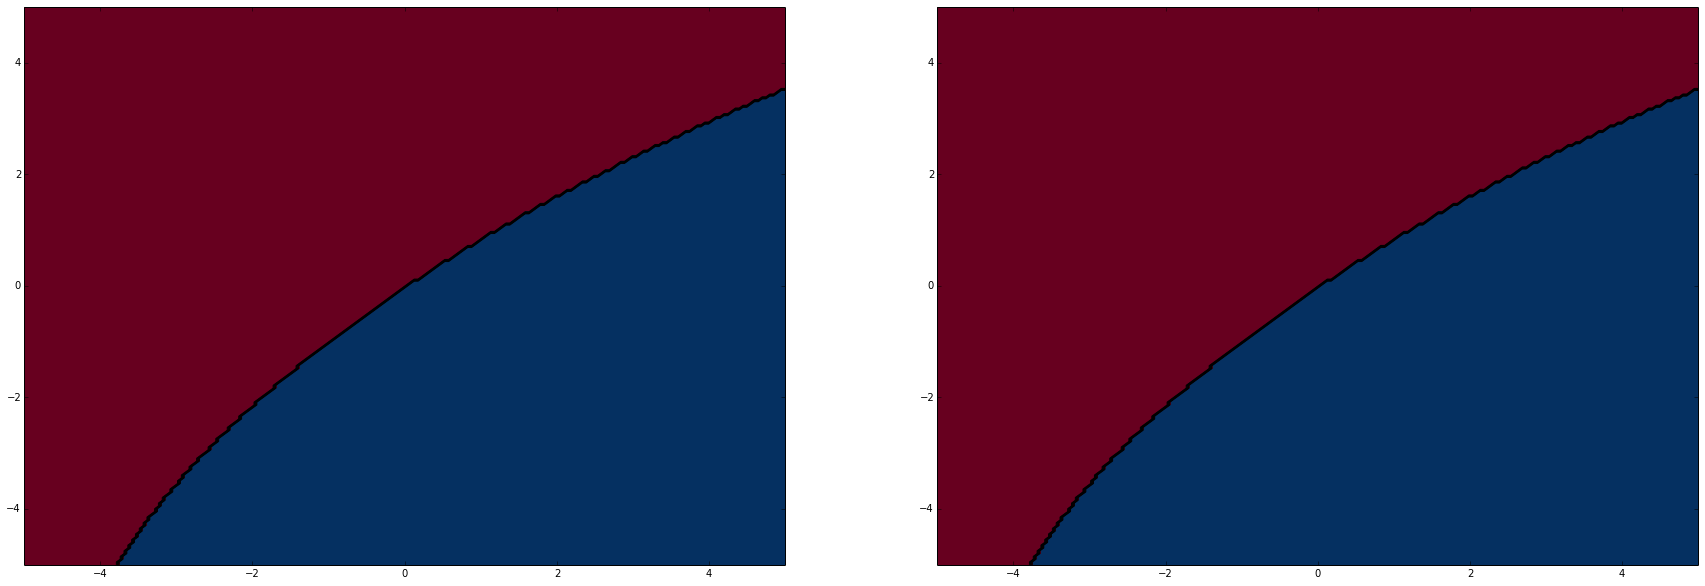

In [15]:
plt.figure(figsize=(30,10))
plt.subplot(121)
plot_model_sk(plt,sklearn_naive1,shogun_feats1_train.get_feature_matrix(),labels1_train)
plt.subplot(122)
plot_model(plt,shogun_naive1,shogun_feats1_train.get_feature_matrix(),labels1_train,fading=False)

### Dataset2 , 4 classes , 2 features

In [16]:
shogun_naive2 = GaussianNaiveBayes()
shogun_naive2.set_features(shogun_feats2_train)
shogun_naive2.set_labels(shogun_labels2_train)
shogun_naive2.train()
print np.sum((labels2_test == shogun_naive2.apply(shogun_feats2_test).get_labels()))/500.0

from sklearn.naive_bayes import GaussianNB
sklearn_naive2 = GaussianNB()
sklearn_naive2.fit(feats2_train, labels2_train)

print np.sum(labels2_test == sklearn_naive2.predict(feats2_test))/500.0

0.786
0.786


### Decision Boundary comparison

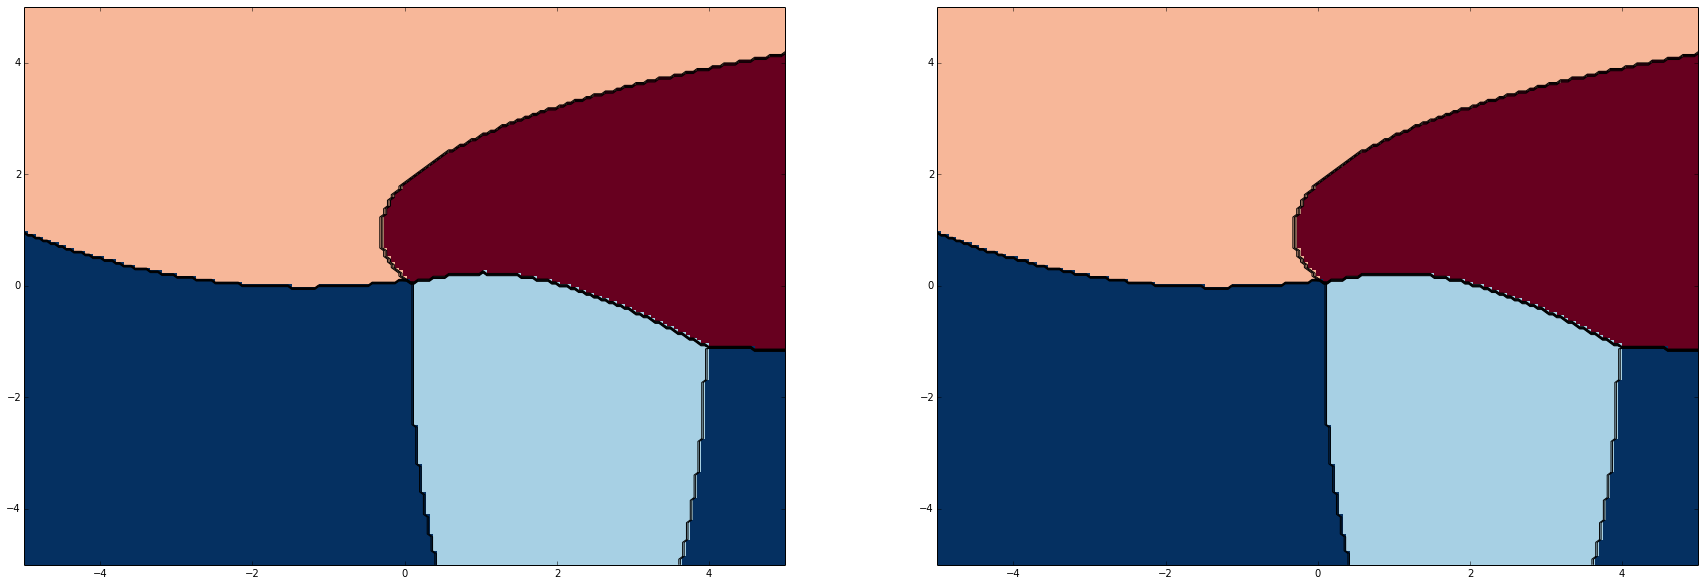

In [17]:
plt.figure(figsize=(30,10))
plt.subplot(121)
plot_model_sk(plt,sklearn_naive2,feats2_train,labels2_train)
plt.subplot(122)
plot_model(plt,shogun_naive2,shogun_feats2_train.get_feature_matrix(),labels2_train,fading=False)

### Dataset 3

In [18]:
shogun_naive3 = GaussianNaiveBayes()
shogun_naive3.set_features(shogun_feats3_train)
shogun_naive3.set_labels(shogun_labels3_train)
shogun_naive3.train()
print np.sum((labels3_test == shogun_naive3.apply(shogun_feats3_test).get_labels()))/1000.0

from sklearn.naive_bayes import GaussianNB
sklearn_naive3 = GaussianNB()
sklearn_naive3.fit(feats3_train, labels3_train)

print np.sum(labels3_test == sklearn_naive3.predict(feats3_test))/1000.0

0.415
0.415


### Dataset 4

In [19]:
shogun_naive4 = GaussianNaiveBayes()
shogun_naive4.set_features(shogun_feats4_train)
shogun_naive4.set_labels(shogun_labels4_train)
shogun_naive4.train()
print np.sum((labels4_test == shogun_naive4.apply(shogun_feats4_test).get_labels()))/1000.0

from sklearn.naive_bayes import GaussianNB
sklearn_naive4 = GaussianNB()
sklearn_naive4.fit(feats4_train, labels4_train)

print np.sum(labels4_test == sklearn_naive4.predict(feats4_test))/1000.0

0.403
0.403


# QDA

### Dataset 1 , 2 classes , 2 features

In [20]:
shogun_qda1 = QDA(shogun_feats1_train, shogun_labels1_train)
shogun_qda1.train()
print np.sum((labels1_test == shogun_qda1.apply(shogun_feats1_test).get_labels()))/100.0

from sklearn import qda
sklearn_qda1 = qda.QDA()
sklearn_qda1.fit(feats1_train,labels1_train)
print np.sum(labels1_test == sklearn_qda1.predict(feats1_test))/100.0

0.89
0.9


/usr/local/lib/python2.7/dist-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


### Dataset 2 , 4 classes , 2 features

In [21]:
shogun_qda2 = QDA(shogun_feats2_train, shogun_labels2_train)
shogun_qda2.train()
print np.sum((labels2_test == shogun_qda2.apply(shogun_feats2_test).get_labels()))/500.0

sklearn_qda2 = qda.QDA()
sklearn_qda2.fit(feats2_train,labels2_train)
print np.sum(labels2_test == sklearn_qda2.predict(feats2_test))/500.0

0.882
0.882


### Dataset 3 , 10 classes , 10 features

In [22]:
shogun_qda3 = QDA(shogun_feats3_train, shogun_labels3_train)
shogun_qda3.train()
print np.sum((labels3_test == shogun_qda3.apply(shogun_feats3_test).get_labels()))/1000.0

sklearn_qda3 = qda.QDA()
sklearn_qda3.fit(feats3_train,labels3_train)
print np.sum(labels3_test == sklearn_qda3.predict(feats3_test))/1000.0

0.27
0.598


### Dataset 4 , 10 classes , 50 features

In [23]:
shogun_qda4 = QDA(shogun_feats4_train, shogun_labels4_train)
shogun_qda4.train()
print np.sum((labels4_test == shogun_qda4.apply(shogun_feats4_test).get_labels()))/1000.0

sklearn_qda4 = qda.QDA()
sklearn_qda4.fit(feats4_train,labels4_train)
print np.sum(labels4_test == sklearn_qda4.predict(feats4_test))/1000.0

0.253
0.501


# Multiclass Logestic Regression

In [24]:
shogun_log1 = MulticlassLogisticRegression(1,shogun_feats1_train,shogun_labels1_train)
shogun_log1.train()

print np.sum((labels1_test == shogun_log1.apply(shogun_feats1_test).get_labels()))/100.0

from sklearn import linear_model
sklearn_log1 = linear_model.LogisticRegression()
sklearn_log1.fit(feats1_train,labels1_train)
print np.sum(labels1_test == sklearn_qda1.predict(feats1_test))/100.0

0.92
0.9


In [25]:
shogun_log2 = MulticlassLogisticRegression(1,shogun_feats2_train,shogun_labels2_train)
shogun_log2.train()

print np.sum((labels2_test == shogun_log2.apply(shogun_feats2_test).get_labels()))/500.0

from sklearn import linear_model
sklearn_log2 = linear_model.LogisticRegression()
sklearn_log2.fit(feats2_train,labels2_train)
print np.sum(labels2_test == sklearn_qda2.predict(feats2_test))/500.0

0.818
0.882


In [26]:
shogun_log3 = MulticlassLogisticRegression(1,shogun_feats3_train,shogun_labels3_train)
shogun_log3.train()

print np.sum((labels3_test == shogun_log3.apply(shogun_feats3_test).get_labels()))/1000.0

from sklearn import linear_model
sklearn_log3 = linear_model.LogisticRegression()
sklearn_log3.fit(feats3_train,labels3_train)
print np.sum(labels3_test == sklearn_qda3.predict(feats3_test))/1000.0

0.393
0.598


In [27]:
shogun_log4 = MulticlassLogisticRegression(1,shogun_feats4_train,shogun_labels4_train)
shogun_log4.train()

print np.sum((labels4_test == shogun_log4.apply(shogun_feats4_test).get_labels()))/1000.0

from sklearn import linear_model
sklearn_log4 = linear_model.LogisticRegression()
sklearn_log4.fit(feats4_train,labels4_train)
print np.sum(labels4_test == sklearn_qda4.predict(feats4_test))/1000.0

0.386
0.501
